In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test = y_test.reshape(-1,)

In [14]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


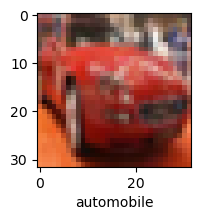

In [16]:
plot_sample(X_train, y_train, 5)

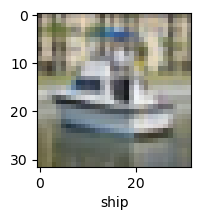

In [21]:
plot_sample(X_train, y_train, 501)

In [22]:
#normalize to (0,1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8142 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6217 - accuracy: 0.4286
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5427 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4830 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4314 - accuracy: 0.4956


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.35      0.78      0.49      1000
           1       0.45      0.79      0.57      1000
           2       0.34      0.40      0.37      1000
           3       0.45      0.19      0.27      1000
           4       0.39      0.47      0.42      1000
           5       0.48      0.29      0.36      1000
           6       0.63      0.34      0.44      1000
           7       0.53      0.55      0.54      1000
           8       0.77      0.35      0.48      1000
           9       0.62      0.33      0.43      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



<function matplotlib.pyplot.show(close=None, block=None)>

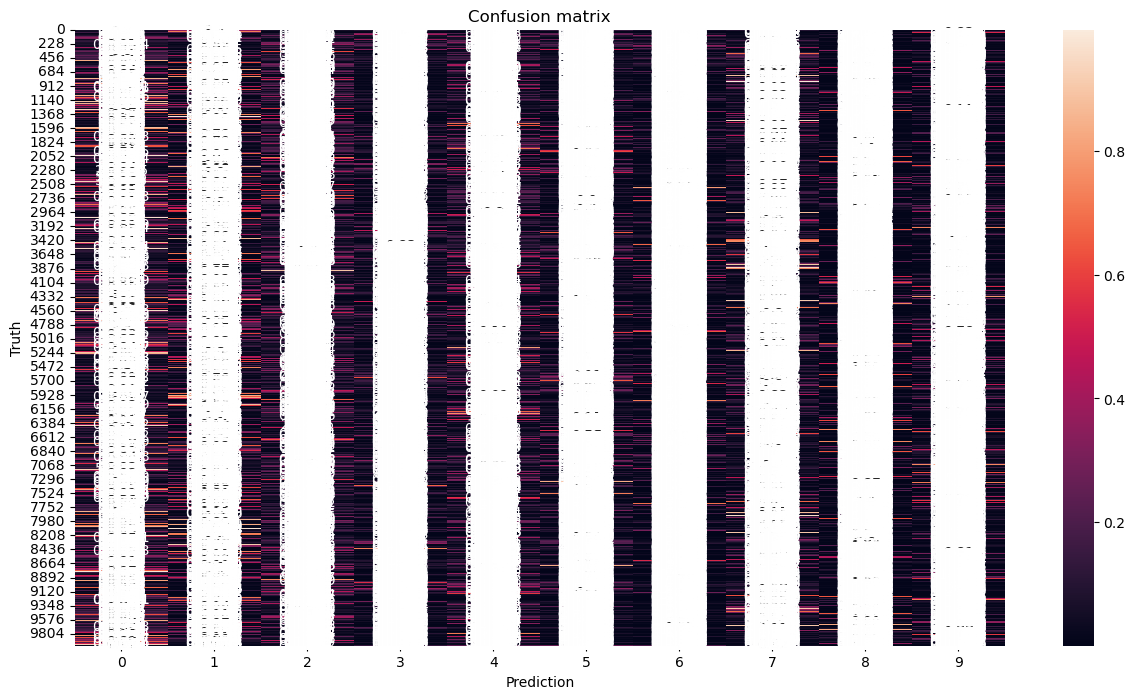

In [30]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [38]:
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [40]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4781 - accuracy: 0.4698
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1202 - accuracy: 0.6085
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0057 - accuracy: 0.6505
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9286 - accuracy: 0.6770
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8743 - accuracy: 0.6975
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8305 - accuracy: 0.7115
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7856 - accuracy: 0.7269
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7490 - accuracy: 0.7394
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7185 - accuracy: 0.7515
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6

In [41]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9827 - accuracy: 0.6763


[0.982681930065155, 0.6762999892234802]

In [42]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.83368696e-02, 1.75299076e-03, 1.87883794e-03, 8.89114559e-01,
        4.77030611e-04, 1.60327647e-02, 9.69890319e-03, 3.82874481e-04,
        5.19506186e-02, 3.74551484e-04],
       [8.07381943e-02, 1.41670972e-01, 6.81894744e-05, 2.13055228e-06,
        2.70046030e-07, 1.27226061e-08, 2.40717024e-09, 4.42250325e-08,
        7.77234018e-01, 2.86201626e-04],
       [1.29701838e-01, 3.39707851e-01, 1.86165923e-03, 1.49502093e-03,
        1.86145073e-04, 5.95694000e-05, 1.67422259e-05, 2.21725611e-04,
        5.03981948e-01, 2.27674730e-02],
       [4.17160064e-01, 7.23980591e-02, 5.54328458e-03, 1.01856844e-04,
        1.42048484e-05, 2.08632337e-05, 3.63614636e-05, 1.95418670e-06,
        5.04648924e-01, 7.45501238e-05],
       [4.86126701e-05, 2.67696421e-04, 2.60599889e-02, 2.30454683e-01,
        5.26911676e-01, 1.45221595e-02, 2.01509118e-01, 1.53714049e-04,
        6.97970609e-05, 2.60021898e-06]], dtype=float32)

In [43]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

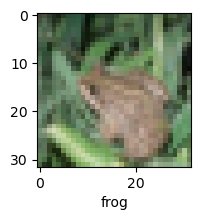

In [48]:
plot_sample(X_test, y_test, 4)

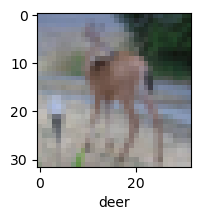

In [46]:
plot_sample(X_test, y_test, 100)

In [50]:
classes[y_classes[60]]

'horse'